# Project: Criminal Relations on Personal Gross Domestic Product #

CS 418 GitHub: [https://github.com/CS418/group-project-data-diver]

###Editor 1: Tri Quan Do - Hypothesis 1
_Note that for Hypothesis 2 and 3, please find the direct link as follow:_

**_Hypothesis 2 Notebook:_**

**_Hypothesis 3 Notebook:_**

----------------------------------------

Student Information:

UIC CS 418, Spring 2023 - CC

Name: Tri Quan Do

NetID: tdo22@uic.edu

UIN: 655 096 891 

**Hypothesis**: GDP is inversely proportional to crime rate.

**Introduction**:

There are two datasets that are used to anaylized hypothesis which is Chicago Crimes 2001 - Now ([https://catalog.data.gov/dataset crimes-2001-to-present](**https://catalog.data.gov/dataset/crimes-2001-to-present**)) that provides an information about the crimes in Chicago from 2001 until now. Moreover, we also use another dataset which is the Chicago GDP from 2001 - Now ([https://fred.stlouisfed.org/series/NGMP16980](**https://fred.stlouisfed.org/series/NGMP16980**)) to point out the corelation between the rate of crimes and GDP.

Detail on progress will be given in each milestone below

In [ ]:
# Package installization required
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install seaborn

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression # Modeling for Machine Learning Task
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

**_Part 1 - Any changes:_** A discussion of whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?

_Answered to Part 1_:

1. Related to the hypothesis schema, the team decided to concentrate on and follow to what has been aforementioned and authorized from Professor and the TA from the previous milestone. Below is the 3 hypothesises have been proposed:

  1.1. GDP is inversely proportional to crime rate

  1.2. The correlation between crime and GDP is larger in Chicago than in the City of Los Angeles.

  1.3. Rate of theft, burglary, and robbery correlate with lower GDP the most with regards to other types of crimes. 

2. Based on the check-in proposal, the team included an additional table called the GDP table to provide a more comprehensive understanding of the relationship between GDP and crime rates. We also compared crime rates in Los Angeles by adding a new data table for its comprehension. Detail on its cleaning and information is not mentioned here as Los Angeles is **only** applicable to Hypothesis 2 and 3. For more detail on how to clean that data file with its description, please follow to the link aforementioned at the header to the Hypothesis 2 and 3 solutions.

------------------


**_Part 2 - Data:_** an introduction that discusses in detail the data you are analyzing. Include where are you getting the data from and the original size of the data. Briefly describe each table and how they will be connected. 


_Answered to Part 2_:

Direct link to Chicago Criminal Data (2001-present): [https://catalog.data.gov/dataset/crimes-2001-to-present]

The dataset provided includes records of reported crimes (excluding murders where data is available for each victim) that took place in Chicago between 2001 and the present, with the most recent seven days of data being excluded. The data is sourced from the CLEAR (Citizen Law Enforcement Analysis and Reporting) system of the Chicago Police Department. To ensure the privacy of crime victims, addresses are only shown at the block level, and exact locations are not disclosed.

**Original size: 1.70 GB (1,833,457,927 bytes)**

Direct link to Chicago GDP (2001-present): [(https://fred.stlouisfed.org/series/NGMP16980)]

Gross domestic product (GDP) by metropolitan area, which is the measure of the market value of all final goods and services produced within a metropolitan area in a particular period of time.

**Original size: 8.00 KB (8,192 bytes)**


**_How the data connected:_** Represent the trend under visualization of crime rate vs gdp and compared by year

------------------

**_Part 3 - Problem:_** Describe the “big idea”? What is the problem you want to solve, the question you want to answer, or the decision-making you want to support? Why should others care about it? How did you choose this problem? 


_Answered to Part 3_:

According to recently revealed official FBI statistics, the entire violent crime rate—which includes homicide, assault, robbery, and rape—inched up by about 5%, although property offenses kept on falling and fell by 8% from the previous year (Treisman 1). The Economic Theory, which assumes a positive association between unemployment and property crime in particular, is the most well-known criminological theory. It states that rising unemployment rates will be associated with rising property crime rates (Becker, 1968; Freeman, 1996).

Over the past few years, crimes have increased across the country, but Chicago is different from other major cities in a few key ways. One is that the rise in violence in this area predates the outbreak. Therefore, the team generates an investigation the relational factor contributes to criminal status. Thus, a solution could be proposed to protect our environment

Therefore, the core concentrates on representing the proportion of GDP/ economic status rate with the criminal scenario in the U.S region, as well as deploy an application that could warn users if a region is ideal to settle down or not. Comparing criminals from 2001 vs 2020 to represent the level of instantaneous rate.


------------------

**_Part 4 - Research questions:_** 

Describe the data science research questions you are investigating. At least one research question per team member.

Related to the hypothesis schema, the team decided to concentrate on and follow to what has been aforementioned and authorized from Professor and the TA from the previous milestone. Below is the 3 hypothesises have been proposed:

  **1.1. GDP is inversely proportional to crime rate**

  1.2. The correlation between crime and GDP is larger in Chicago than in the City of Los Angeles.

  1.3. Rate of theft, burglary, and robbery correlate with lower GDP the most with regards to other types of crimes. 

**Research Question for Hypothesis 1:** 

Is there a statistically significant inverse relationship between a country's GDP and its crime rate?

**Abstract:** This study explores the relationship between a country's GDP and its crime rate. The research question asks whether there is a significant inverse correlation between these two variables. By analyzing data from various countries and using appropriate statistical methods, the study aims to provide insights into the potential impact of economic factors on crime rates.

-----------------------------------------


**_Part 5 - Data cleaning:_** Show clearly how you cleaned your data, step by step. Show the original data size and the final size. Discuss how much data was lost after cleaning. At least one table is cleaned per team member. 

_Answered to Part 5_:

**Original size: 1.70 GB (1,833,457,927 bytes)**

Note that since the original data is large that it is not possible to upload to Google Collab Virtual Environment as error detected is "ParserError: Error tokenizing data. C error: EOF inside string starting at row 4920076". Furthermore, time complexity is high for uploading successfully the file that could take more than 1 hours for finishing the upload. However, it is easy to cause the virtual machine to crash due the overloading. Therefore, I came up with a strategy that split the original data into multiple small tables as:

1. file_01_05 = "Chicago_Crimes_2001_to_2005.csv"
2. file_06_10 = "Chicago_Crimes_2006_to_2010.csv"
3. file_11_15 = "Chicago_Crimes_2011_to_2015.csv"
4. file_16_17 = "Chicago_Crimes_2016.csv"
5. file_17_18 = "Chicago_Crimes_2017.csv"
6. file_18_19 = "Chicago_Crimes_2018_to_2019.csv"
7. file_20_22 = "Chicago_Crimes_2020_to_2022.csv"

**Size of each data file after complexity deduction:**

1. file_01_05: 4.96 MB (5,205,742 bytes)
2. file_06_10: 64.0 KB (65,536 bytes)
3. file_11_15: 28.7 MB (30,142,464 bytes)
4. file_16_17: 54.9 MB (57,577,472 bytes)
5. file_17_18: 54.5 MB (57,221,120 bytes)
6. file_18_19: 74.4 MB (78,020,970 bytes)
7. file_20_22: 2.14 MB (2,245,409 bytes)

Therefore, it takes less than 5 minutes for uploading the whole files and avoiding crashing since the size has been optimized.

**Data lost: 0**. Since excel has the filter option, I just filter by year and move row corresponding to the fitered year to another table and save under another name. Hence, no data lost has been detected that Sum of rows from break-down file = orignal data file.


Please view the code below for the cleaning process of cleaning "Chicago_Crime_2001_to_Present" to support Hypothesis 1: GDP is inversely proportional to crime rate

-----------------------------

**Part 6 - Exploratory data analysis**
_Please observe data visualization as below_

**Part 7 - Model planning:**

1. SVM (Super Vector Machine):  It works by finding the optimal hyperplane that separates the criminal data into different classes or predicts the output variable for new input data. In this case, GDP is a input feature and the criminal data is the target variable. 

 *Advantages:*

  + SVM can work well in high-dimensional spaces, making it suitable for datasets with a large number of input features.

  + SVM can handle both numerical and categorical input features.

  + SVM can capture nonlinear and complex relationships between the input and output variables, making it useful for finding correlations between crime rate and GDP.

  + SVM can be robust to outliers and noise in the data.

  + SVM can provide a clear and interpretable decision boundary that can help to understand the relationship between the input and output variables.

 *Disadvantages:*

  + SVM can be computationally expensive and may require significant computational resources to train and tune the model, especially for large datasets.

  + SVM may not perform well if the data is imbalanced, meaning that there are many more observations of one class than the other, as this can lead to biased predictions.

  + SVM is sensitive to the choice of kernel function and hyperparameters, and choosing the right combination can be difficult.

  + SVM may not work well if the number of features is much larger than the number of observations, as the model may become overfit to the training data.

  + SVM may not be suitable for datasets with a large number of observations, as training the model may become computationally infeasible.

2. Random Forest: To use Random Forest for finding the correlation between crime rate and GDP, you can train a regression model using the crime rate as the target variable and GDP as the input feature. Random Forest can help to identify the nonlinear and complex relationships between the input and output variables, and can handle a large number of input features.

  *Advantages:* 

  + Random Forest can handle both numerical and categorical input features.
  
  + Random Forest can capture nonlinear and complex relationships between the input and output variables, making it useful for finding correlations between crime rate and GDP.
  
  + Random Forest can provide feature importance scores that can help to identify the most important input features for predicting crime rate.
  
  + Random Forest can be less prone to overfitting than other machine learning algorithms, as it combines the predictions of multiple decision trees.
  
  *Disadvantages:*

  + Random Forest can be computationally expensive and may require significant computational resources to train and tune the model.
  
  + Random Forest can be difficult to interpret, as it combines the predictions of multiple decision trees.
  
  + Random Forest may not work well if the input features are highly correlated or if there are irrelevant input features in the dataset.
  
  + Random Forest may not work well if there are imbalanced classes in the target variable, as this can lead to biased predictions.

3. Decision Tree: We first create a dataset with independent variables (features) such as GDP, and a dependent variable (target) such as crime rates. Split the data into training and testing sets.

 *Benefits*:

  + Interpretability: Decision trees are easy to understand and interpret, as they provide a clear, hierarchical structure that can be visualized.

  + Handling of mixed data types: Decision trees can handle both continuous and categorical data, making them suitable for a variety of problems.

  + Non-parametric: Decision trees don't require assumptions about the underlying distribution of data, unlike many other statistical models.

 *Drawbacks:* 

  + Overfitting: Decision trees can easily overfit the data, leading to poor generalization performance. Techniques such as pruning or using ensemble methods like random forests can help address this issue.

  + Sensitivity to small changes: Decision trees can be sensitive to small variations in the data, resulting in significantly different tree structures. This can be mitigated by using ensemble methods or cross-validation.

  + Inability to model complex relationships: Decision trees can struggle to model complex relationships between variables, especially if those relationships are not easily represented by a hierarchical structure.

  + Suboptimal splits: Decision tree algorithms often use greedy methods for splitting, which can lead to suboptimal trees. However, this issue can be addressed using more advanced algorithms or ensemble methods.

**Part 8 - Reflection: a discussion of the following:**

1. What is the hardest part of the project that you’ve encountered so far?

  1.1. The most challenging is cleaning data and find a more efficienct data or checking the error existed with affect to the accuracy. Note that since the data is large, it is hard to generate unit_test case for a 100% accurate. Processing a lot of data can be memory-intensive, which can cause performance problems or even system crashes if there isn't enough memory accessible. As having mentioned before that I had to split to multiple table manually and the process required weeks to complete.

  1.2. Another challenging is that the criminal data report is not consistency, in which the criminal record in year 2004, 2005 is significantly different from 2001. For example, there were 7 record for 2004 while more than 10,000 records in 2001; which means some information had been implicitly hidden or the data does not support full record in a year, which reduce the accuracy the conclusion

2. What are your initial insights?

  For the first problem on data complexity, I completed the manual splitting to be able to upload files to virtual environment. However, when studying Data Mining in 483, I have known that PySpark or Hadoop virtual environment could support for large data with high performance of $O(log N)$, I may try to search on that approach

  For the second problem, I need to find data for each year with number record is approximately or not significantly different. In case no databases support, I may come up with grouping by year-period instead of specifying each year


3. Are there any concrete results you can show at this point? If not, why not?

  Yes. I have shown the significant different among data record. The reason I am postponing the model training is that I need more time to find consistent data; otherwise, I may come up with Professor for advise or change location (instead of concentrate on Chicago, I could change to New York or Wisconsin...) which contain for database record in an appropriate consistency


4. Going forward, what are the current biggest problems you’re facing?

  Finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP

5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

  Yes, I am on track with the project as models formula has been found and it is not hard to apply the models if the data has been clean and extracted to the dataFrame. There is **one** challenge is finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP


6. Given your initial exploration of the data, is it worth proceeding with your project, and why? 

  Currently, the data could not be trained with models due to the accuracy (please view the figure at the end of the report for more detail due to the inconsistent record from the source)


7. If not, how are you going to change your project and why do you think it’s better than your current results?

  Currently, I am not thinking about changing the project. If yes, the only thing need to be changed is the data files instead of the project idea.The investigation of the intricate and diverse correlation between GDP and crime is crucial to comprehending the impact of economic factors on crime. Through such research, we can gain insights into how fluctuations in economic conditions influence crime rates and how various economic variables contribute to the occurrence of distinct categories of criminal activities. Furthermore, it is imperative to recognize that the connection between GDP and crime is intimately linked to social inequality. Studies have demonstrated that individuals hailing from underprivileged socioeconomic backgrounds are more susceptible to engaging in criminal conduct. Therefore, delving into this relationship can assist in identifying regions where social inequality is particularly prominent and in devising targeted interventions aimed at curbing criminal activities while promoting social mobility.

-----------------------------------

**Part 9 - Next steps**

After having the data cleanned, we will spend more effort on training the model based on the the processed data. The goal for next milestone should be try to train the model to achieve the accuracy of 65%-70%. As soon as we can not have that goal achieved, we will get back to the data and try to re-format the data to be the best fit to the chosen models. The worst case is that the models do not work well, we will have to change to the new model to fit the data. The goal for this project is to achieve as much as accuracy for the model, but 65%-70% should be the minimum, otherwise, the model does not fit the dataset.

------------------------

**Part 10 - References:** 

1. World Bank. (n.d.). GDP (current US$) - United States. Retrieved February 27, 2023, from
 https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=US

2. City of Chicago. (n.d.). Crimes - 2001 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crimes-2001-to-present

3. U.S. Department of Justice. (2021). Crime Data from 2020 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crime-data-from-2020-to-present

4. Beck, A. (2020, July). Exploring the Link Between Economics and Crime: A Complex Picture [White paper]. CAP Index. 
https://capindex.com/wp-content/uploads/2020/07/Exploring-the-Link-Between-Economics-and-Crime-A-Complex-Picture-A-paper-by-Professor-Adrian-Beck-with-CAP-Index-July-2020_f.pdf

5. NPR. (2022, October 27). U.S. Crime Data Could Shape Midterm Elections. NPR. 
https://www.npr.org/2022/10/27/1131825858/us-crime-data-midterm-elections


6. NPR. (2021, September 27). FBI Data Show Surge In Murders In 2020. NPR. 
  
  https://www.npr.org/2021/09/27/1040904770/fbi-data-murder-increase-2020


7. World Bank. (n.d.). GDP (current US$). Retrieved February 27, 2023, from 

  https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

8. Kristiansen, Søren L. “Nearest Neighbors with Keras and Coreml.” Medium, Medium, 20 May 2019, https://medium.com/@sorenlind/nearest-neighbors-with-keras-and-coreml-755e76fedf36. 

9. Goyal, Anant. “Logistic Regression with Keras.” MarkTechPost, 9 Apr. 2021, https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/. 

10. Masui, Tomonori. “All You Need to Know about Gradient Boosting Algorithm − Part 1. Regression.” Medium, Towards Data Science, 12 Feb. 2022, https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502.

In [3]:
# Some critical list declarations
file_01_05 = "Chicago_Crimes_2001_to_2005.csv"
file_06_10 = "Chicago_Crimes_2006_to_2010.csv"
file_11_15 = "Chicago_Crimes_2011_to_2015.csv"
file_16_17 = "Chicago_Crimes_2016.csv"
file_17_18 = "Chicago_Crimes_2017.csv"
file_18_19 = "Chicago_Crimes_2018_to_2019.csv"
file_20_22 = "Chicago_Crimes_2020_to_2022.csv"

# Important columns for training
critical_cols = ['Date','Primary Type','Location Description','Arrest','District','Year']
file_path_lst = [file_01_05, file_06_10, file_11_15, file_16_17, 
                 file_17_18, file_18_19, file_20_22]

In [24]:
def import_crime_data(file_path=file_20_22, expect_col=[], file_list=[], read_many=False):
  """
    This function imports crime data from a CSV file or 
    a list of CSV files. It drops missing values and 
    unnecessary columns from the data and returns 
    a Pandas DataFrame.

    Parameters:
    file_path (str): 
      the path to the CSV file to import
      (default: file_20_22)
    expect_col (list):
      a list of column names to keep in the data
      (default: [])
    file_list (list):
      a list of file paths to import if read_many is True
      (default: [])
    read_many (bool): 
      True if importing multiple files, False if importing a single file
      (default: False)

    Returns:
    A Pandas DataFrame containing the cleaned crime data.
  """
  # When reading multiples file, return a list of frames
  if read_many is True:
    dataFrame_list = []

    for f_name in file_list:
      data_csv = pd.read_csv(f_name)
      dataFrame_list.append(data_csv)

    dataFrames_Final = []
    # Drop unnecessary columns that only retrieve from expected one
    if len(expect_col) > 0:
      for frame in dataFrame_list:
        new_frame = frame.loc[:, expect_col]
        dataFrames_Final.append(new_frame)
    else:
      dataFrames_Final = dataFrame_list

    return dataFrames_Final

  # Case when import 1 single file only
  data_csv = pd.read_csv(file_path)
  data_csv.dropna(inplace=True)           # drop rows missed value
  data_csv.to_csv(file_path, index=False) # Write back

  # Drop unnecessary columns that only retrieve from expected one
  if len(expect_col) > 0:
    data_csv = data_csv.loc[:, expect_col]

  return data_csv

In [41]:
def group_by_col(dataFrame, col_group_name="Year", col_list=[]):
  """
    This function groups the input Pandas DataFrame by 
    a specified column name or a list of column names.
    It returns a Pandas Series object of the counts 
    for each unique value in the groupby column(s).

    Parameters:
    dataFrame (pandas.DataFrame):
      the input Pandas DataFrame to group by
    col_group_name (str):
      the name of the column to group by (default: "")
    col_list (list): 
      a list of column names to group by (default: False)

    Returns:
    A Pandas Series object of the counts for 
    each unique value in the groupby column(s).
  """
  try:
    if len(col_list)==0:
      return dataFrame[col_group_name].value_counts()

    # Performing data count group by for visualization
    my_data = list()
    for column in col_list:
      data_count = dataFrame[column].value_counts()
      my_data.append(data_count)
    return my_data

  except Exception as e:
    print("Internal errors when performing group_by, please check again", str(e))
    return None

In [27]:
# DataFrame Reading from 2001-2022
chicago_GDP_Frames = import_crime_data(file_list=file_path_lst, expect_col=critical_cols, read_many=True)

In [29]:
# First 10 rows chicago crime in 2001-2005
chicago_GDP_Frames[0].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,1/1/2001 11:00,DECEPTIVE PRACTICE,RESIDENCE,False,4,2001
1,1/1/2003 0:01,SEX OFFENSE,RESIDENCE,False,8,2003
2,9/15/2001 2:00,BATTERY,STREET,False,12,2001
3,11/2/2001 18:30,THEFT,OTHER,False,1,2001
4,12/15/2001 2:00,BATTERY,STREET,False,18,2001
5,9/26/2002 13:30,BATTERY,STREET,False,8,2002
6,10/1/2002 19:00,MOTOR VEHICLE THEFT,STREET,False,14,2002
7,11/5/2002 16:40,ROBBERY,STREET,True,8,2002
8,8/7/2005 7:15,THEFT,STREET,False,25,2005
9,10/1/2005 9:00,THEFT,OTHER,True,10,2005


In [30]:
# First 10 rows chicago crime in 2006-2010
chicago_GDP_Frames[1].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,1/1/2007 0:01,CRIM SEXUAL ASSAULT,RESIDENCE,False,11,2007
1,1/1/2010 0:01,CRIM SEXUAL ASSAULT,RESIDENCE,False,6,2010
2,1/1/2007 0:01,CRIM SEXUAL ASSAULT,RESIDENCE,False,10,2007
3,1/1/2008 0:01,CRIM SEXUAL ASSAULT,RESIDENCE,False,11,2008
4,1/1/2007 0:01,CRIM SEXUAL ASSAULT,DAY CARE CENTER,False,25,2007
5,10/24/2008 14:30,DECEPTIVE PRACTICE,APARTMENT,False,16,2008
6,1/24/2009 18:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,9,2009
7,7/24/2008 0:01,SEX OFFENSE,APARTMENT,False,11,2008
8,8/4/2009 12:00,DECEPTIVE PRACTICE,RESIDENCE,False,3,2009
9,1/1/2009 0:00,CRIM SEXUAL ASSAULT,RESIDENCE,True,6,2009


In [31]:
# First 10 rows chicago crime in 2011-2015
chicago_GDP_Frames[2].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,9/5/2015 13:30,BATTERY,RESIDENCE,False,9,2015
1,9/4/2015 11:30,THEFT,CTA BUS,False,15,2015
2,9/5/2015 12:45,NARCOTICS,SIDEWALK,True,14,2015
3,9/5/2015 13:00,ASSAULT,APARTMENT,False,15,2015
4,9/5/2015 10:55,BURGLARY,RESIDENCE,False,6,2015
5,9/4/2015 18:00,BURGLARY,RESIDENCE-GARAGE,False,14,2015
6,9/5/2015 13:00,THEFT,GROCERY FOOD STORE,True,10,2015
7,9/5/2015 11:30,ROBBERY,STREET,False,12,2015
8,9/5/2015 14:00,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,8,2015
9,9/5/2015 11:00,BATTERY,SMALL RETAIL STORE,False,16,2015


In [32]:
# First 10 rows chicago crime in 2016-2017
chicago_GDP_Frames[3].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,5/1/2016 0:25,DECEPTIVE PRACTICE,NaN,False,8,2016
1,10/19/2016 19:00,BURGLARY,RESTAURANT,False,4,2016
2,3/29/2016 7:00,DECEPTIVE PRACTICE,OTHER,False,3,2016
3,3/11/2016 23:00,CRIM SEXUAL ASSAULT,RESIDENCE PORCH/HALLWAY,False,17,2016
4,1/1/2016 11:00,DECEPTIVE PRACTICE,RESIDENCE,False,5,2016
5,3/1/2016 0:00,OTHER OFFENSE,AUTO / BOAT / RV DEALERSHIP,False,22,2016
6,12/1/2016 0:01,DECEPTIVE PRACTICE,RESIDENCE,False,3,2016
7,4/1/2016 0:00,DECEPTIVE PRACTICE,RESIDENCE,False,18,2016
8,9/13/2016 9:55,DECEPTIVE PRACTICE,NaN,False,15,2016
9,5/8/2016 9:45,DECEPTIVE PRACTICE,NaN,False,7,2016


In [33]:
# First 10 rows chicago crime in 2017-2018
chicago_GDP_Frames[4].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,10/8/2017 3:00,CRIM SEXUAL ASSAULT,RESIDENCE,False,22.0,2017
1,3/28/2017 14:00,BURGLARY,OTHER,False,8.0,2017
2,9/9/2017 20:17,THEFT,RESIDENCE,False,3.0,2017
3,8/26/2017 10:00,CRIM SEXUAL ASSAULT,HOTEL/MOTEL,False,1.0,2017
4,1/1/2017 0:01,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,10.0,2017
5,7/17/2017 10:10,THEFT,RESIDENCE,False,14.0,2017
6,12/28/2017 15:55,DECEPTIVE PRACTICE,NaN,False,1.0,2017
7,2/10/2017 12:00,CRIMINAL DAMAGE,APARTMENT,False,6.0,2017
8,11/22/2017 2:42,OTHER OFFENSE,APARTMENT,False,17.0,2017
9,7/29/2017 15:40,THEFT,SIDEWALK,False,24.0,2017


In [34]:
# First 10 rows chicago crime in 2018-2019
chicago_GDP_Frames[5].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,9/1/2018 0:01,THEFT,RESIDENCE,False,6,2018
1,1/1/2018 8:00,DECEPTIVE PRACTICE,RESIDENCE,False,25,2018
2,9/24/2019 8:00,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,1,2019
3,10/13/2019 20:30,THEFT,GROCERY FOOD STORE,False,12,2019
4,12/20/2018 16:00,OTHER OFFENSE,RESIDENCE,False,17,2018
5,4/1/2018 0:01,DECEPTIVE PRACTICE,RESIDENCE,False,6,2018
6,12/20/2018 15:00,DECEPTIVE PRACTICE,APARTMENT,False,25,2018
7,10/5/2019 18:30,THEFT,RESIDENCE,False,12,2019
8,12/18/2018 11:00,DECEPTIVE PRACTICE,RESIDENCE,False,19,2018
9,10/13/2019 19:00,CRIMINAL DAMAGE,STREET,False,19,2019


In [35]:
# First 10 rows chicago crime in 2020-2022
chicago_GDP_Frames[6].head(10)

,Date,Primary Type,Location Description,Arrest,District,Year
0,3/17/2020 21:30,THEFT,STREET,False,16,2020
1,3/18/2020 2:03,MOTOR VEHICLE THEFT,APARTMENT,False,11,2020
2,3/18/2020 8:50,ASSAULT,RESIDENCE,False,25,2020
3,3/18/2020 13:00,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,11,2020
4,3/18/2020 17:35,NARCOTICS,SIDEWALK,True,15,2020
5,3/16/2020 0:05,THEFT,STREET,False,2,2020
6,3/18/2020 18:00,ROBBERY,STREET,False,10,2020
7,3/18/2020 14:04,BATTERY,RESIDENCE,False,4,2020
8,3/18/2020 21:27,OTHER OFFENSE,SIDEWALK,False,9,2020
9,3/18/2020 7:30,THEFT,STREET,False,25,2020


In [ ]:
# Extract the number of criminal over each year
year_01_05 = [2001, 2002, 2003, 2004, 2005]
num_crime_01_05 = group_by_col(chicago_GDP_Frames[0])
num_crime_01_05 = num_crime_01_05.tolist()

num_crime_06_10 = group_by_col(chicago_GDP_Frames[1])
num_crime_06_10 = num_crime_06_10.tolist()

num_crime_11_15 = group_by_col(chicago_GDP_Frames[2])
num_crime_11_15 = num_crime_11_15.tolist()

num_crime_16_17 = group_by_col(chicago_GDP_Frames[3])
num_crime_16_17 = num_crime_16_17.tolist()

num_crime_17_18 = group_by_col(chicago_GDP_Frames[4])
num_crime_17_18 = num_crime_17_18.tolist()

num_crime_18_19 = group_by_col(chicago_GDP_Frames[5])
num_crime_18_19 = num_crime_18_19.tolist()

num_crime_20_22 = group_by_col(chicago_GDP_Frames[6])
num_crime_20_22 = num_crime_20_22.tolist()

num_crime = num_crime_01_05 + num_crime_06_10 + num_crime_11_15 + \
            num_crime_16_17 + num_crime_17_18 + num_crime_18_19 + \
            num_crime_20_22
num_crime

In [54]:
# Output num criminal record over each year
i = 1
for num in num_crime:
  str_text = "Crime record in year 200"
  if i >= 10:
    str_text = "Crime record in year 20"
  print(str_text + str(i) + ":", num)
  i = i+1

Crime record in year 2001: 24312
Crime record in year 2002: 498
Crime record in year 2003: 29
Crime record in year 2004: 15
Crime record in year 2005: 7
Crime record in year 2006: 141
Crime record in year 2007: 79
Crime record in year 2008: 57
Crime record in year 2009: 30
Crime record in year 2010: 26
Crime record in year 2011: 135257
Crime record in year 2012: 921
Crime record in year 2013: 381
Crime record in year 2014: 258
Crime record in year 2015: 176
Crime record in year 2016: 261411
Crime record in year 2017: 260133
Crime record in year 2018: 258738
Crime record in year 2019: 95951
Crime record in year 2020: 7957
Crime record in year 2021: 1492
Crime record in year 2022: 594


In [69]:
# Reference: https://www.arduino.cc/reference/en/language/functions/math/map/
def normalize(x, in_min, in_max, out_min, out_max):
  """
    Normalizes a value x from an input range [in_min, in_max] 
    to an output range [out_min, out_max].

    Parameters:
    -----------
    x : float
        The value to be normalized.
    in_min : float
        The minimum value of the input range.
    in_max : float
        The maximum value of the input range.
    out_min: float
        The minimum value of the output range.
    out_max: float
        The maximum value of the output range.

    Returns:
    --------
    float
        The normalized value of x in the output range.
  """
  return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min


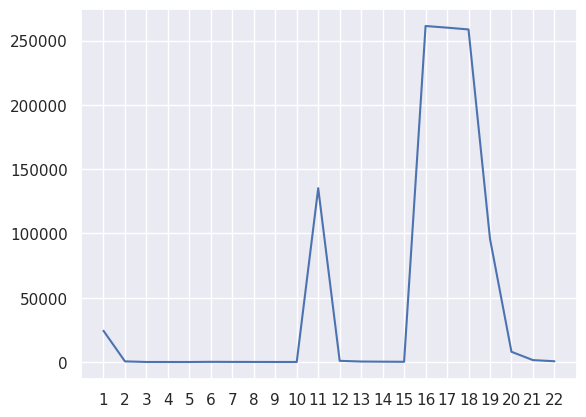

In [58]:
# Chart (before scaling normalization) for criminal
year_label = range(1, 23)
plt.plot(year_label, num_crime)
plt.xticks(np.arange(1, 23, 1)) # Set the x_step
plt.show()

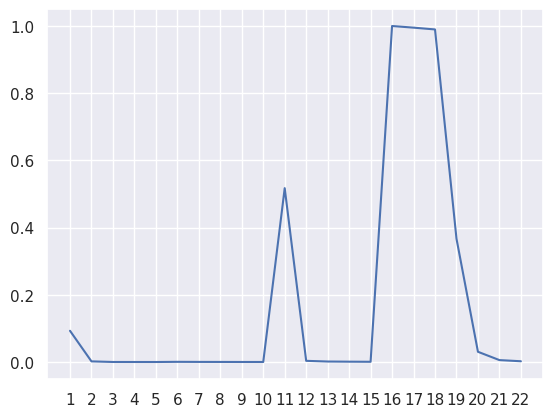

In [70]:
# Chart (after scaling normalization) for criminal
num_crime_normalize = [normalize(x, 0, 261411, 0, 1) for x in num_crime]
num_crime_normalize
year_label = range(1, 23)
plt.plot(year_label, num_crime_normalize)
plt.xticks(np.arange(1, 23, 1)) # Set the x_step
plt.show()